# Introduction to Random Sampling Strategies

In this section we will learn about different random sampling strategies and in which cases they are useful.

This notebook covers the following strategies:
- sampling from a normal distribution
- sampling from a uniform distribution
- sampling with a latin hypercube

You will explore the generated combinations of conditions and compare them visually.

You are also going to scale the gathered conditions to a certain value range to keep the differently collected conditions as comparable as possible.

## Setup

First, we set the general parameters and methods which will be used at each stage of this notebook.

The parameters in this case are:
- the sample size
- the number of factors.
- the value range for the levels

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from typing import Iterable

np.random.seed(42)

n_samples = 10
n_factors = 2
level_range = (0, 1)

### Scaling

Before gathering the different conditions, we will implement a scaling method.

This scaling method will scale the gathered conditions to a given range.

In [2]:
def scale(x, range: Iterable):
    """
    Scale the input to the given range.
    Args:
        x: the input to scale. Can be any type that can be converted to a numpy array.
        range: the range to scale to. Must be a tuple of length 2, with the first element being the minimum and the second element being the maximum.
    """
    assert len(range) == 2, "range must be an iterable of length 2."
    
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    x = x * (range[1] - range[0]) + range[0]

    return x

Does it work properly? Let's see!

In [3]:
array = [1, 2, 3, 4, 5, 6]

array = scale(array, level_range)

print(f"The scaled array is {array}.")

The scaled array is [0.  0.2 0.4 0.6 0.8 1. ].


## Sampling from a normal distribution

The first sampling strategy which we will implement is sampling from a normal distribution.

We take the numpy.random.normal method.

You can take a look at the [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), if you are not familiar with it.

Use the parameters from the Setup section.

In [4]:
# generate the conditions combinations with a normal distribution
# add your code here
conditions_normal = np.random.normal(size=(n_samples, n_factors))

# scale the conditions combinations to the range (-1, 1) with your scale function
# add your code here
conditions_normal = scale(conditions_normal, level_range)

Did it work? Let's inspect the result in a scatter plot.

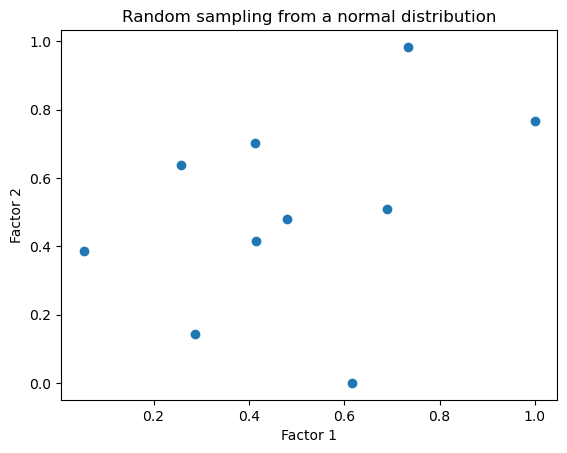

In [5]:
plt.scatter(conditions_normal[:, 0], conditions_normal[:, 1])
plt.title('Random sampling from a normal distribution')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Increase the sample size and re-run the code to see how the gathered conditions change. 

## Sampling from a uniform distribution

The second sampling strategy which we will implement is sampling from a uniform distribution.

We take the numpy.random.normal method.

You can take a look at the [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html), if you are not familiar with it.

Use the parameters from the Setup section.

In [6]:
conditions_uniform = None

# generate the conditions combinations with a uniform distribution
# add your code here
conditions_uniform = np.random.uniform(low=0, high=1, size=(n_samples, n_factors))

# We do not have to scale the uniform distribution in this case because it is already in the range (-1, 1)

Did it work? Let's inspect the result in a scatter plot.

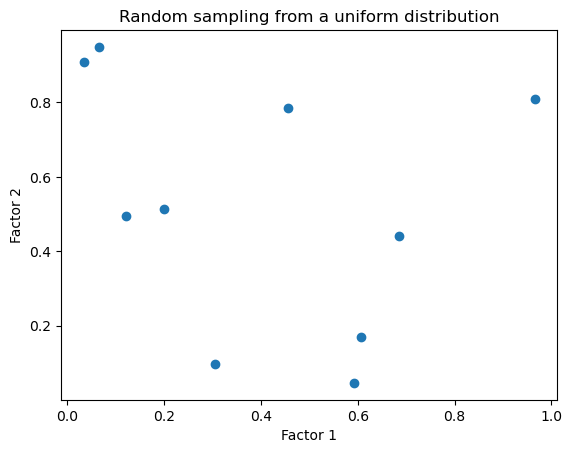

In [7]:
plt.scatter(conditions_uniform[:, 0], conditions_uniform[:, 1])
plt.title('Random sampling from a uniform distribution')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Increase the sample size and re-run the code to see how the gathered conditions change. 

## Sampling from a Latin Hypercube

Lastly, we will implement the latin hypercube strategy.

For that we will take the scipy.stats.qmc.LatinHypercube method.

Please make yourself familiar with it through the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.LatinHypercube.html).

And here again - use the parameters from the setup.

Tip: We import the LatinHypercube class from scipy. Use the 'random' method of this class to create the condition combinations.

In [8]:
from scipy.stats.qmc import LatinHypercube

# generate the conditions combinations with a normal distribution
latinhypercube = LatinHypercube(d=n_factors)
conditions_lhc = latinhypercube.random(n_samples)

# scale the conditions combinations to the range (-1, 1) with your scale function
conditions_lhc = scale(conditions_lhc, level_range)

Did it work? Let's inspect the result in a scatter plot.

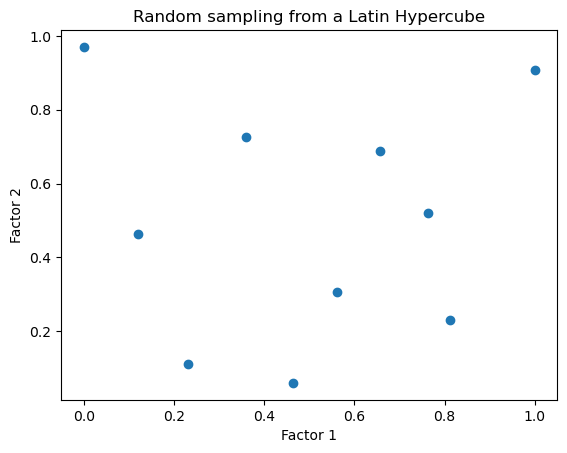

In [9]:
plt.scatter(conditions_lhc[:, 0], conditions_lhc[:, 1])
plt.title('Random sampling from a Latin Hypercube')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Does it look any different from the normal distribution?

Increase the sample size and re-run the code to see how the gathered conditions change.

## Detailed analysis of the obtained results

Here we will now analyze the obtained results with respect to their coverage.

We will compute the coverage and plot a 2D histogram of the differently gathered conditions. 

This will give us a better idea of the differences - especially between uniform and Latin Hypercube sampling - than simple scatter plots.

First of all, copy the sampling commands which you already implemented into the following cell so we do not have to re-run each cell when changing the sample size.

(And don't forget to scale here as well)

For the Latin Hypercube:
    Make this time use of the 'optimization' keyword and watch the difference

In [10]:
n_samples = 100
np.random.seed(0)

conditions_normal = scale(np.random.normal(0, 1, (n_samples, n_factors)), level_range)
conditions_uniform = np.random.uniform(level_range[0], level_range[1], (n_samples, n_factors))
conditions_lhc = scale(LatinHypercube(d=n_factors, optimization='lloyd').random(n_samples), level_range)

Let's compute the coverage of the conditions with respect to the design space!

The steps for our analysis look as follows:
1. Compute the target coverage which is $target=\frac{n_\text{samples}}{n_\text{bins}**n_\text{factors}}$
2. Compute 2D Histograms for each of the methods where the number of samples per bin is counted
3. Compute the bin-wide coverage for each method
4. Compute under-, over- and highly over-represented bins ($bin_\text{count}<target$; $bin_\text{count}>target$; $bin_\text{count}>target*threshold$)

In [11]:
hist_bins = 10
threshold_highly_overrepresented = 2  # more than 2 samples in one bin

# compute the target coverage
target_coverage = np.max((n_samples/(hist_bins**n_factors), 1))
threshold_highly_overrepresented = target_coverage * threshold_highly_overrepresented
print(f'Target coverage: {target_coverage} samples per bin')

# compute 2D histograms for each sampling method with the numpy method
hist_normal = np.histogram2d(conditions_normal[:, 0], conditions_normal[:, 1], bins=hist_bins)[0]
hist_uniform = np.histogram2d(conditions_uniform[:, 0], conditions_uniform[:, 1], bins=hist_bins)[0]
hist_lhc = np.histogram2d(conditions_lhc[:, 0], conditions_lhc[:, 1], bins=hist_bins)[0]

# compute the actual coverage for each sampling method
coverage_normal = np.round(np.sum(hist_normal > 0)/(hist_bins**n_factors) * 100, 2)
coverage_uniform = np.round(np.sum(hist_uniform > 0)/(hist_bins**n_factors) * 100, 2)
coverage_lhc = np.round(np.sum(hist_lhc > 0)/(hist_bins**n_factors) * 100, 2)

# compute the amount of underrepresented bins for each sampling method
underrep_normal = round(np.sum(hist_normal < target_coverage)/(hist_bins**n_factors) * 100, 2)
underrep_uniform = round(np.sum(hist_uniform < target_coverage)/(hist_bins**n_factors) * 100, 2)
underrep_lhc = round(np.sum(hist_lhc < target_coverage)/(hist_bins**n_factors) * 100, 2)

# compute the amount of overrepresented bins for each sampling method
overrep_normal = round(np.sum(hist_normal > target_coverage)/(hist_bins**n_factors) * 100, 2)
overrep_uniform = round(np.sum(hist_uniform > target_coverage)/(hist_bins**n_factors) * 100, 2)
overrep_lhc = round(np.sum(hist_lhc > target_coverage)/(hist_bins**n_factors) * 100, 2)

# compute the amount of highly overrepresented bins for each sampling method
highly_overrep_normal = round(np.sum(hist_normal > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)
highly_overrep_uniform = round(np.sum(hist_uniform > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)
highly_overrep_lhc = round(np.sum(hist_lhc > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)

# print the results in a table
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')
print(f'{"Sampling method":<25} {"Coverage [%]":<15} {"Underrepresented [%]":<25} {"Overrepresented [%]":<25} {"Highly overrepresented [%]":<25}')
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')
print(f'{"Normal distribution":<25} {coverage_normal:<15} {underrep_normal:<25} {overrep_normal:<25} {highly_overrep_normal:<25}')
print(f'{"Uniform distribution":<25} {coverage_uniform:<15} {underrep_uniform:<25} {overrep_uniform:<25} {highly_overrep_uniform:<25}')
print(f'{"Latin Hypercube":<25} {coverage_lhc:<15} {underrep_lhc:<25} {overrep_lhc:<25} {highly_overrep_lhc:<25}')
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')


Target coverage: 1.0 samples per bin
------------------------- --------------- ------------------------- ------------------------- -------------------------
Sampling method           Coverage [%]    Underrepresented [%]      Overrepresented [%]       Highly overrepresented [%]
------------------------- --------------- ------------------------- ------------------------- -------------------------
Normal distribution       54.0            46.0                      28.0                      15.0                     
Uniform distribution      63.0            37.0                      24.0                      12.0                     
Latin Hypercube           86.0            14.0                      14.0                      0.0                      
------------------------- --------------- ------------------------- ------------------------- -------------------------


Let's make the corresponding plots!

The plotting is already implemented to make your life a little bit easier. 

You are still very welcome to go through the plotting code on your own as oftentimes this can be a quite challenging part!

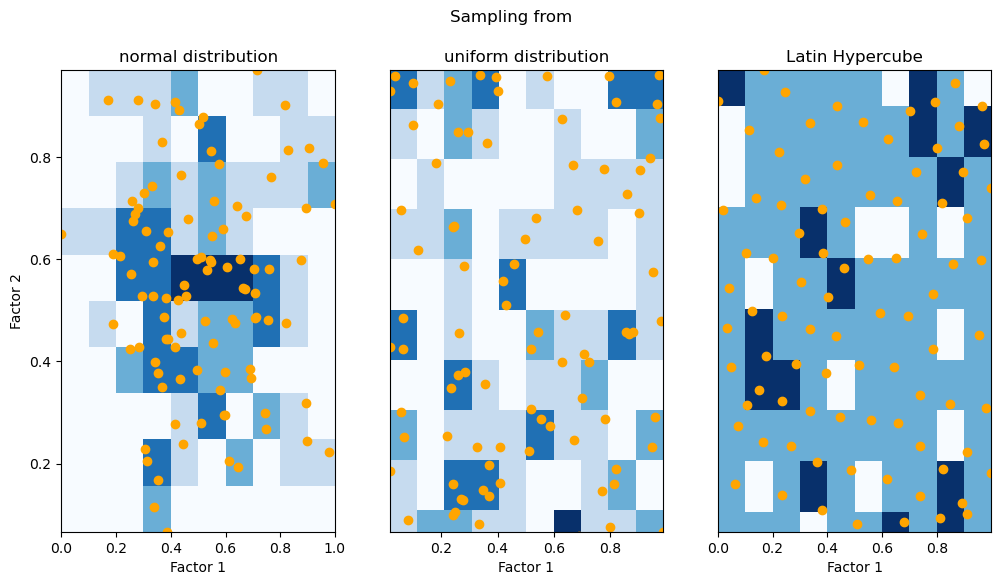

In [12]:
scatter = True

# make a figure with three subplots for the three sampling methods
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# plot the samples from the normal distribution on the first subplot
axes[0].hist2d(conditions_normal[:, 0], conditions_normal[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[0].scatter(conditions_normal[:, 0], conditions_normal[:, 1], color='orange')
axes[0].set_title('normal distribution')
axes[0].set_xlabel('Factor 1')
axes[0].set_ylabel('Factor 2')

# plot the samples from the uniform distribution on the second subplot
axes[1].hist2d(conditions_uniform[:, 0], conditions_uniform[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[1].scatter(conditions_uniform[:, 0], conditions_uniform[:, 1], color='orange')
axes[1].set_title('uniform distribution')
axes[1].set_xlabel('Factor 1')

# plot the LHS samples on the third subplot
axes[2].hist2d(conditions_lhc[:, 0], conditions_lhc[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[2].scatter(conditions_lhc[:, 0], conditions_lhc[:, 1], color='orange')
axes[2].set_title('Latin Hypercube')
axes[2].set_xlabel('Factor 1')

# set figure title
fig.suptitle('Sampling from')

# share y axis
axes[1].sharey(axes[0])
axes[2].sharey(axes[0])
# hide y axis for the second and third subplot
axes[1].get_yaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)

plt.show()

After doing all these analysis: What's your impression of the different random sampling methods?

Can you think of use-cases for each of the method?

Can you tell now a difference between the uniform and Latin Hypercube sampling?

# Let's set up our own experiment with these sampling methods!

Let's check if we get significantly different results for the presented random sampling methods with respect to noise, dataset size and dataset structure (i.e. number of repetitions per condition vs number of conditions).
First of all, we have to import the existing classes for the experimental unit, the dataset generator, and the feed-forward-network regressor. You should be familiar with these from the last tutorial.

## Library, package and class imports

In [13]:
import os, sys
import torch
# from skorch import NeuralNetRegressor
from sklearn.metrics import mean_squared_error

# Set the path to the project folder
target_folder = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Adjust path as needed
if target_folder not in sys.path:
    sys.path.append(target_folder)

In [14]:
# import the custom classes for our experiment
from resources.synthetic import experimental_unit, normal_ground_truth, noise, generate_dataset
from resources.regressors import FFN, FFNRegressor

Now we have to set up the sampling strategy and generate the dataset. You can use the respective parts from the first tutorial. Set the number of participants, tested conditions, repitions and the noise level as seen before.

In [31]:
# define the dataset parameters

# number of experimental units
n_units = 100

# number of observations per experimental unit
n_conditions = 100

# number of repetitions per condition
n_repetitions = 1

# amount of noise which we are going to add to the data
noise_level = 0.3

# relative amount of train vs test samples
train_ratio = 0.8

In [32]:
experimental_units = None
train_data = None
test_data = None
parameters = None
conditions = None

# create parameters from a normal distribution (more natural than a uniform distribution)
parameters = np.random.normal(1, 0.5, (n_units, 2))
parameters = np.where(parameters < 0, 1e-6, parameters)

# draw conditions based on the sampling strategy
conditions = np.random.normal(0.5, 0.25, (n_conditions, 2))
conditions = scale(conditions, level_range)

# create a list of experimental units
experimental_units = []

# create the experimental units
for i in range(n_units):
    experimental_units.append(
        experimental_unit(
            problem_solver=normal_ground_truth,
            noise=noise,
            parameters=parameters[i],
            noise_level=noise_level,
        )
    )

# add your code here
# you can use the generate_dataset method to create a dataset which you can then split into train and test samples
dataset, dataset_flat = generate_dataset(experimental_units, conditions, n_repetitions, shuffle=True)
train_data = dataset_flat[:int(len(dataset_flat)*train_ratio)]
test_data = dataset_flat[int(len(dataset_flat)*train_ratio):]

Now we can train the regressor based on the generated dataset 

In [33]:
model = FFNRegressor(FFN(n_units, 2), max_epochs=100, lr=0.1)
model.fit(train_data[:, 0:-1], train_data[:, -1][:, None])

prediction = model.predict(test_data[:, 0:-1])
loss = mean_squared_error(test_data[:, -1][:, None], prediction)

print(f"Test loss: {loss:.8f}")


epoch	train loss
1/100	0.25400704
2/100	0.06857928
3/100	0.03858670
4/100	0.02299554
5/100	0.01355410
6/100	0.00879559
7/100	0.00709314
8/100	0.00617374
9/100	0.00547715
10/100	0.00526047
11/100	0.00524710
12/100	0.00498782
13/100	0.00479835
14/100	0.00475302
15/100	0.00468556
16/100	0.00470387
17/100	0.00492518
18/100	0.00486355
19/100	0.00467610
20/100	0.00455376
21/100	0.00436642
22/100	0.00417274
23/100	0.00423192
24/100	0.00422915
25/100	0.00424220
26/100	0.00419276
27/100	0.00396166
28/100	0.00411549
29/100	0.00422471
30/100	0.00404423
31/100	0.00370225
32/100	0.00363024
33/100	0.00359006
34/100	0.00391578
35/100	0.00351129
36/100	0.00378368
37/100	0.00408358
38/100	0.00332727
39/100	0.00314478
40/100	0.00343771
41/100	0.00316316
42/100	0.00295855
43/100	0.00280756
44/100	0.00301455
45/100	0.00294946
46/100	0.00276181
47/100	0.00260659
48/100	0.00259401
49/100	0.00259258
50/100	0.00251549
51/100	0.00248819
52/100	0.00250869
53/100	0.00246366
54/100	0.00248449
55/100	0.00267290
5

Let's inspect the trained model in more detail

/home/daniel/repositories/CourseOptimizingExperimentalDesign/resources/regressors.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32, device=self.device)


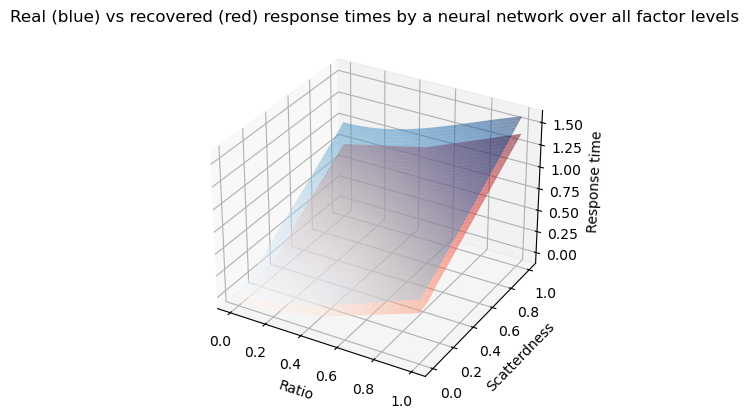

In [34]:
# plot the recovered response times over the conditions
# define the factor levels
x = np.linspace(0, 1)
y = np.linspace(0, 1)
x_mesh, y_mesh = np.meshgrid(x, y)
sample_size = len(x)

# initiate the z array
z_recovered = np.zeros((sample_size, sample_size))
z_real = np.zeros((sample_size, sample_size))

unit_id = 30

# collect the observations
for i in range(sample_size):
    condition = torch.tensor(np.stack((x_mesh[i], y_mesh[i]), axis=-1))
    unit_id_array = torch.full((condition.shape[0], 1), unit_id)
    X = torch.cat((unit_id_array, condition), axis=-1)
    
    z_recovered[i, :] = model.predict(X).reshape(-1)
    z_real[i, :] = experimental_units[unit_id].step(np.stack((x_mesh[i], y_mesh[i]), axis=-1), noise=False)
    
# make a surface plot to visualize the ground_truth
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x_mesh, y_mesh, z_recovered, cmap=cm.Reds, alpha=0.5)
ax.plot_surface(x_mesh, y_mesh, z_real, cmap=cm.Blues, alpha=0.5)
ax.set_title('Real (blue) vs recovered (red) response times by a neural network over all factor levels')
ax.set_xlabel('Ratio')
ax.set_ylabel('Scatterdness')
ax.set_zlabel('Response time')
plt.show()

## Congratulations!

You've finished the tutorial on random sampling!